<a href="https://colab.research.google.com/github/DantonCoote/My_Hub/blob/DeepLearning/Assign_1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 Deep Learning and Neural Networks

# Step 1, Importing libraries and Data Cleaning

In [1]:
import tensorflow as tf
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn import model_selection
import tensorflow as tf

In [2]:
data = pd.read_excel("Concrete_Data.xls")

In [3]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

We see that there are no null datatypes in our dataset so we can safely assume that there are no potential null values in this dataset

In [5]:
dups = data.duplicated()
for i in dups:
  if i == True:
    print("There are duplicates")
    break

There are duplicates


In [6]:
data = data.drop_duplicates()

In [7]:
data.reset_index(drop=True)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


After finding duplicates, we remove them and reset our index in the data. We are now working with a clean dataset and can continue onward.

## Step 1.2 Data Exploration

<Axes: >

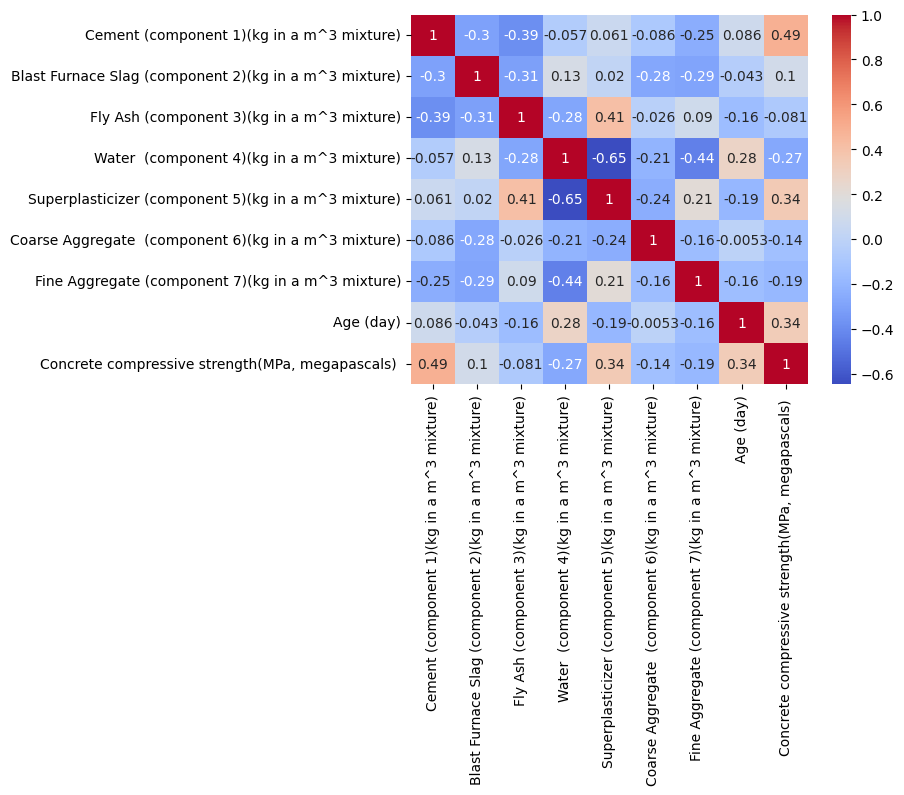

In [8]:
corr_max = data.corr()
sb.heatmap(corr_max, cmap="coolwarm", annot=True)

I am not a cement expert, but from what I can see we have a few correlations here. We see a strong relation between compressive strength and the amount of cement used in a batch. We alse see age has relations to water content and strength. We see some negative relations that may have more insight with a pairplot, specifically the water to superplasticizer ratios.

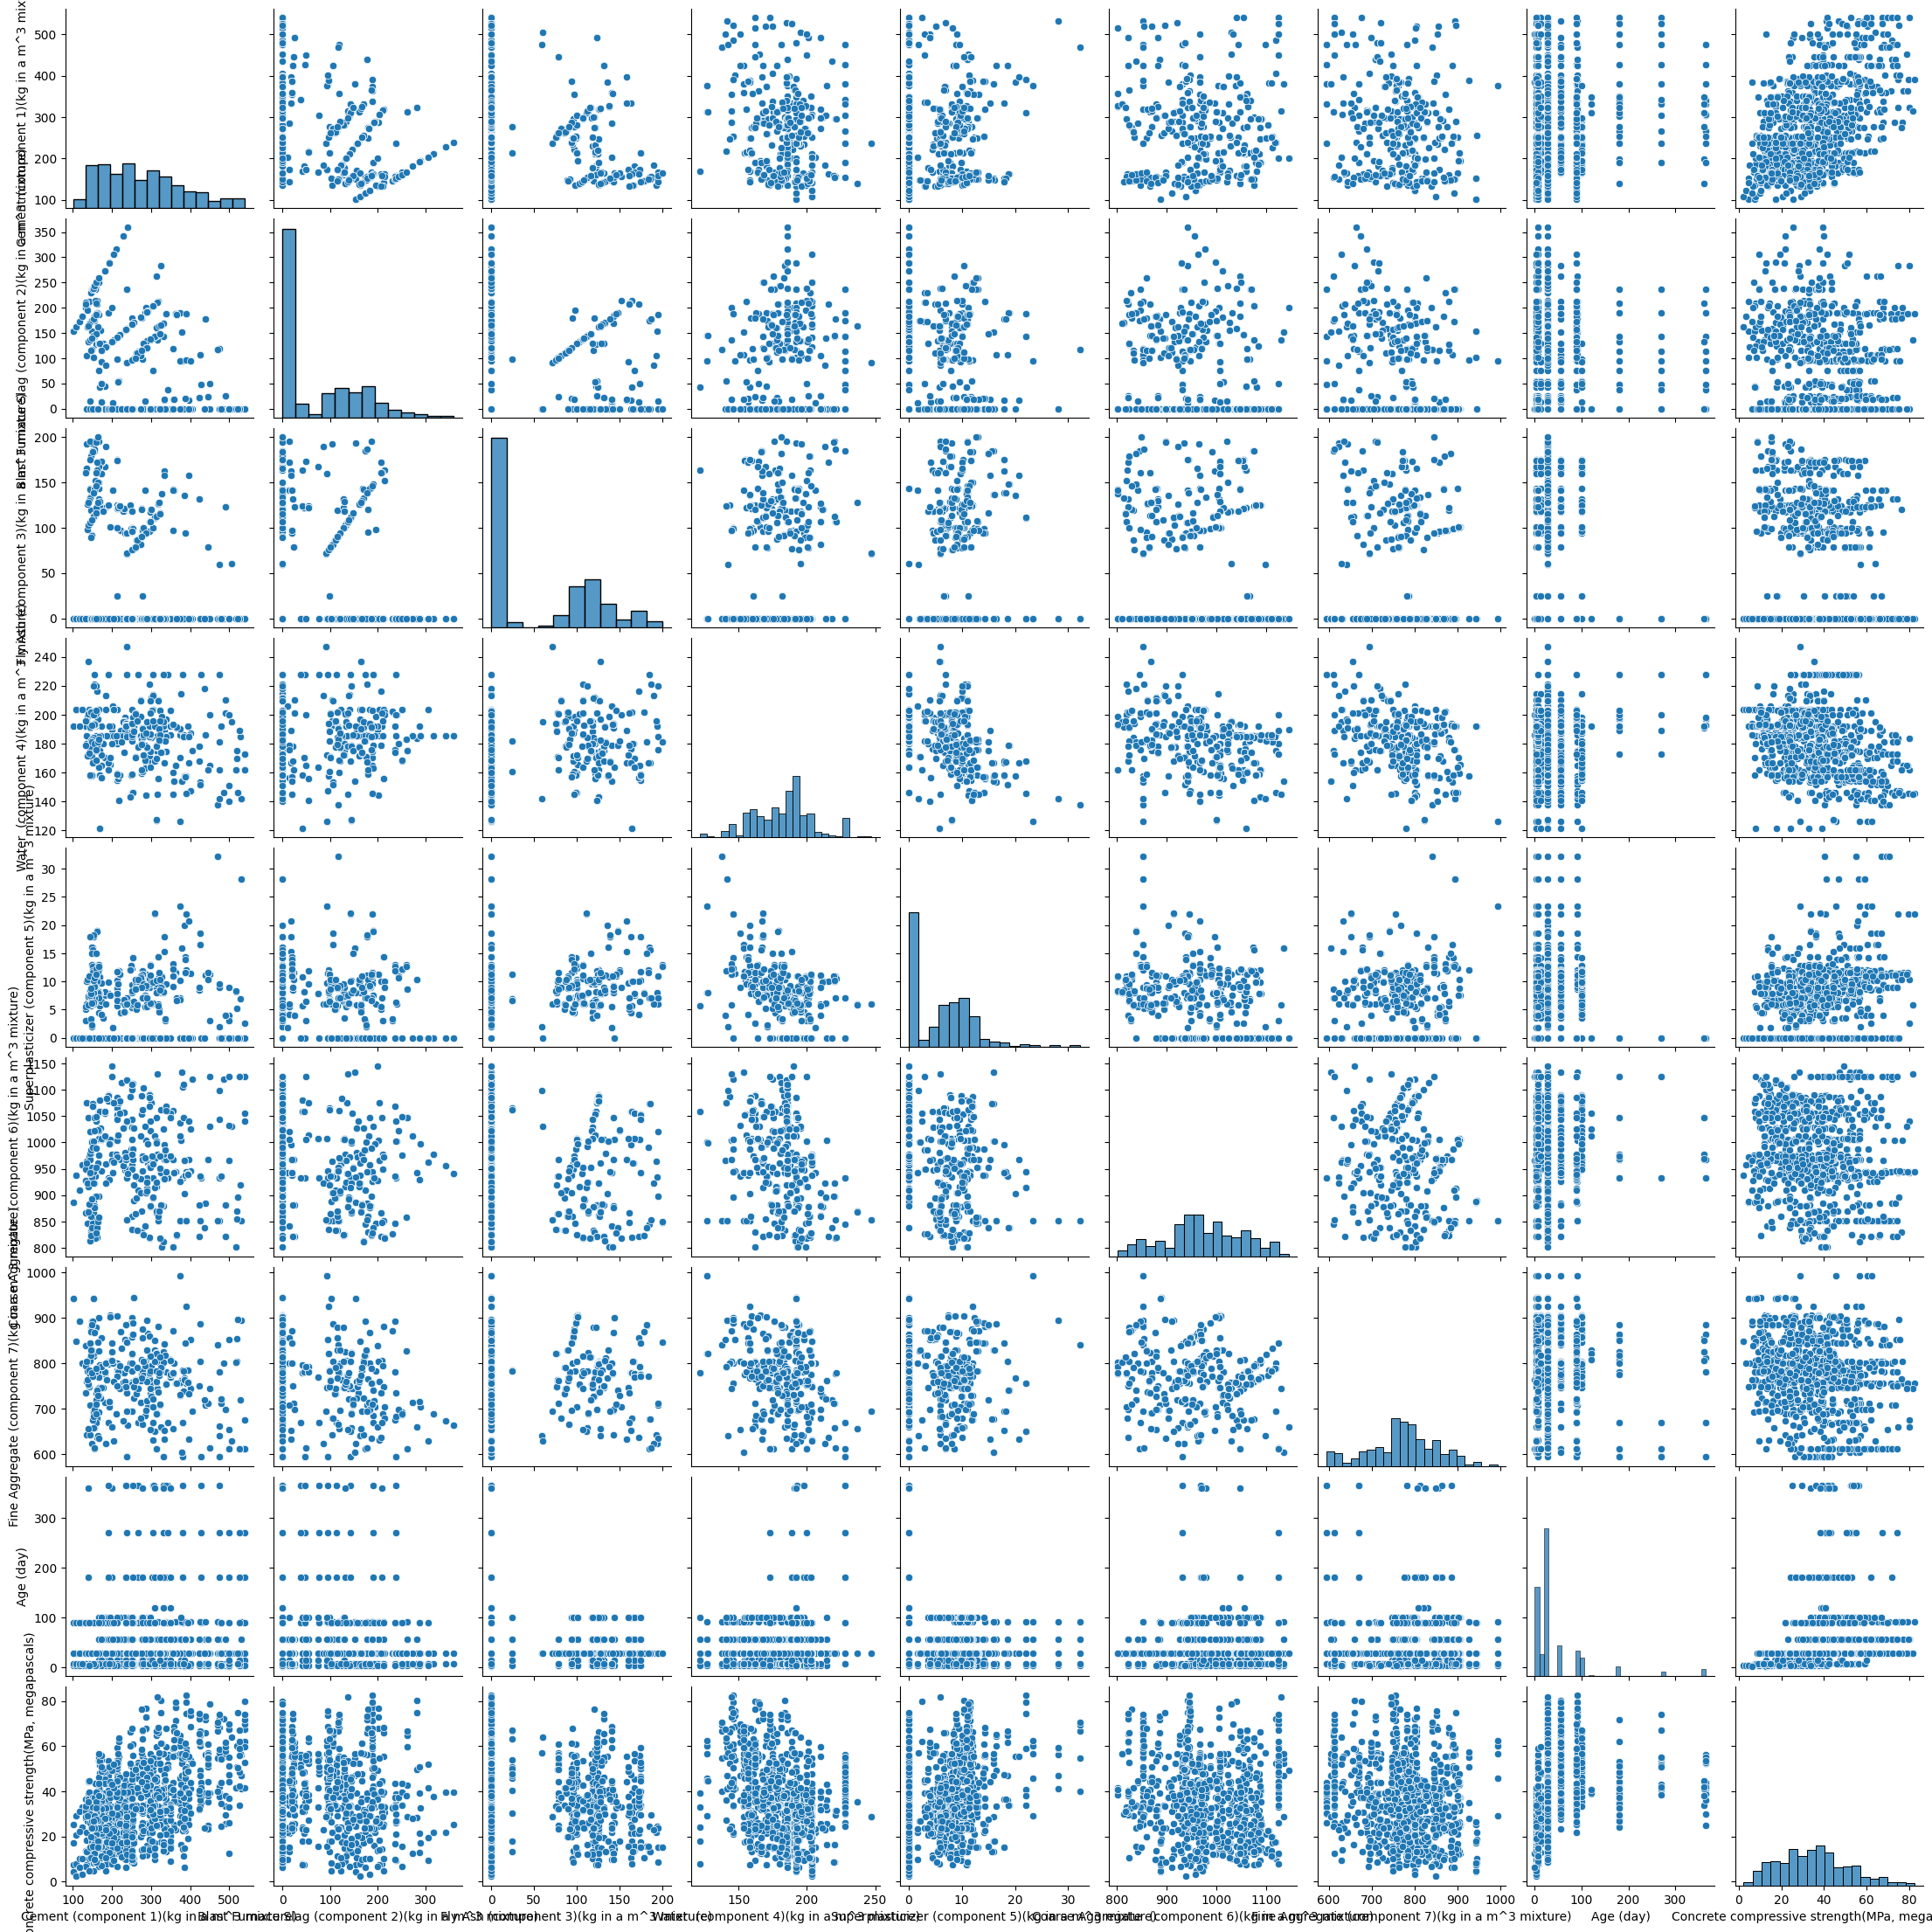

In [9]:
sb.pairplot(data)

This is definitely something. I am not too sure what goes where as we see a lot of seemingly unrelated variables in this dataset. I do however see that the water to plasticizer ratio is a negative linear relation. As someone whom doesn't have any expertise in concrete mixing, I find this data is generally confusing on a surface level.

# Step 2, Modeling

## Step 2.1, Preprocessing

In [10]:
# Seperating our labels from the data
strength = data['Concrete compressive strength(MPa, megapascals) ']
data = data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)

# Initializing a scaler
scaler = preprocessing.MinMaxScaler()

In [11]:
#Confirming changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1005 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1005 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1005 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1005 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1005 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1005 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1005 non-null   float64
 7   Age (day)                                              1005 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 70.7 KB
None


In [12]:
# Scaling our feature data
scaled = scaler.fit_transform(data)

#splitting our data
train_x, test_x, train_y, test_y = model_selection.train_test_split(scaled, strength, train_size=0.9)

In [13]:
# Confirming changes
print(len(train_x), "        ", len(train_y))
print("X:\n", train_x[:5], "\nY:\n", train_y[:5])

904          904
X:
 [[0.33835616 0.46410684 0.         0.65269461 0.         0.51337209
  0.25112895 0.01648352]
 [0.3306621  0.         0.62508746 0.17205589 0.37236025 0.83081395
  0.51904165 0.03571429]
 [0.39997717 0.27217585 0.12223888 0.31097804 0.34751553 0.75784884
  0.47280482 0.1510989 ]
 [0.29623288 0.         0.6077961  0.41684631 0.20869565 0.74244186
  0.46274461 0.07417582]
 [0.53858447 0.52587646 0.         0.4243513  0.29503106 0.41773256
  0.40592072 0.07417582]] 
Y:
 664    19.350144
330    42.216615
357    66.824014
271    33.729166
138    49.897378
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


Here we are quickly scaling our data, essentially turning it into relevent weights, that are going to be used to train our model/models. We then split the data into a training dataset and a testing dataset to ensure accuracy.

## Step 2.2 Training the Model

In [14]:
# converting to TensorFlow variables
x_train = tf.Variable(train_x)
x_test = tf.Variable(test_x)

y_train = tf.Variable(train_y)
y_test = tf.Variable(test_y)

In [15]:
# Taken from our textbook, the features is our number of columns.
Number_of_features = 8
Number_of_units = 1

# assigning weights and bias to TensorFlow Variables
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

In [22]:
optimizer = tf.optimizers.SGD(0.001) # Assigning a learning rate

# Defining a perceptron neuron
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    return z

# Defining a training function that iterates the perceptron through
def train(i):
    for n in range(i):
      loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_train, logits=perceptron(x_train))))
      optimizer.scale_loss(loss)

In [23]:
# Let's train this perceptron
train(1000)

In [24]:
tf.print(weight, bias)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]] [0]


In [25]:
ypred = perceptron(x_test)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul] name: 